In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
!pip install scikit-plot
import scikitplot as skplt
from scipy.stats import pearsonr


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()


Saving 2mill_cll_avg_abs.csv to 2mill_cll_avg_abs.csv


# Data Pre-Processing

In [5]:
df=pd.read_csv('2mill_cll_avg_abs.csv')

df.rename({'Unnamed: 0': 'Sample'}, axis=1, inplace=True)

In [6]:
df.head()

,Sample,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,Tumour
0,N154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,1
1,N177,0.0,0.0,0.55319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,1
2,N219,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,3.0,0
3,N277,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,3.0,0
4,N364,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0


In [7]:
df_x=df.loc[:,'chr1': 'chr22']
df_y=df.loc[:,'Tumour']

In [8]:
df_x.tail()

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22
80,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
81,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
82,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
83,0.0,-0.734618,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500174,0.0,0.0
84,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [9]:
df_y.tail()

80    1
81    1
82    1
83    1
84    1
Name: Tumour, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state =10)

In [11]:
X_train.head()

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.453176,0.0,0.0,0.0,0.130771,0.0,-0.012026,0.0,0.224714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
38,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_train.head()

4     0
5     1
58    1
38    0
77    1
Name: Tumour, dtype: int64

In [13]:
# Check for nan values

check_for_nan = df.isnull()
df[df.isnull().any(axis=1)]

,Sample,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrX,chrY,Tumour


In [14]:
# Check for class imbalance
print('Percent of non-tumour samples:',df[df.Tumour==0].shape[0] / df.shape[0])
print('Percent of tumour samples:',df[df.Tumour==1].shape[0] / df.shape[0])

Percent of non-tumour samples: 0.49411764705882355
Percent of tumour samples: 0.5058823529411764


# Random Forest

## Hyperparameter Optimisation

In [15]:
rf = RandomForestClassifier(random_state=1)

param_dist = {'max_depth': [2,3,4,5],
              'bootstrap': [True, False],
              'max_features': ['log2', 'auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10, 
                     param_grid = param_dist, 
                     n_jobs = -1)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search:', 
      cv_rf.best_params_)

Best Parameters using grid search: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}


In [16]:
rf.set_params(max_depth = 4,
              max_features = 'log2',
              criterion = 'entropy')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
# rf.set_params(warm_start=True, 
#                   oob_score=True)

# min_estimators = 400
# max_estimators = 1000

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     rf.set_params(n_estimators=i)
#     rf.fit(X_train, y_train)

#     oob_error = 1 - rf.oob_score_
#     error_rate[i] = oob_error

# oob_series = pd.Series(error_rate)


OOB error for number of estimators

In [18]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',
#                 color = 'green')

# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')


## Random Forest Classifier

In [19]:
rf=RandomForestClassifier()

rf.set_params(n_estimators=700,
              bootstrap=True,
              warm_start = False)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred=rf.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0])

## Results

Classification report

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.55      0.71        11

    accuracy                           0.81        26
   macro avg       0.88      0.77      0.78        26
weighted avg       0.86      0.81      0.79        26



Variable importance 

In [22]:
# names_index = df_x.columns

# importances = rf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(df_x.shape[1]):
#     print("{0}. feature {1}: {2:.6f} ".format(f + 1, names_index[indices[f]], importances[indices[f]]))

# # Plot the impurity-based feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(df_x.shape[1]), importances[indices],
#         color="#875FDB", align="center")
# plt.xticks(range(df_x.shape[1]), names_index[indices])
# plt.xlim([-1, df_x.shape[1]])
# plt.xticks(rotation=90)
# plt.show()

# from sklearn.inspection import permutation_importance
# result = permutation_importance(rf, df_x, df_y, n_repeats=10)
# print('Importances mean', result.importances_mean)
# print('Importances std', result.importances_std)


Confusion Matrix

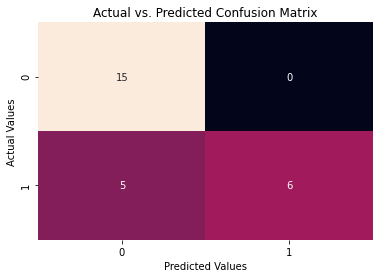

In [23]:
pred=rf.predict(X_test)

test_crosstb_comp = pd.crosstab(index = y_test, columns = pred)
test_crosstb = test_crosstb_comp.values

sns.heatmap(test_crosstb, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

ROC curve 

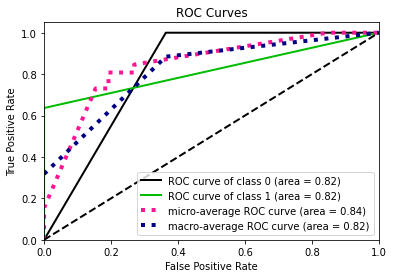

In [24]:
prediction_probability = rf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, prediction_probability)
prediction_probability = rf.predict_proba(X_test)

plt.show()

# Neural Network

## Hyperparameter Optimisation

In [25]:
mlp = MLPClassifier(max_iter=10000)

parameter_space = {
    'hidden_layer_sizes': [(22,22,22), (22,44,22), (22,22,22,22,22)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.001],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)



Best parameters found:
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (22, 44, 22), 'learning_rate': 'adaptive', 'solver': 'adam'}


## Neural Network Classifier

In [26]:
# Using the best parameters 

mlp.set_params(max_iter=5000, 
               activation = 'tanh', 
               alpha = 0.001, 
               hidden_layer_sizes = (22, 44, 22), 
               learning_rate = 'constant', 
               solver= 'sgd')

mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [27]:
predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

## Results

Classification Report

In [28]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[15  0]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       1.00      0.45      0.62        11

    accuracy                           0.77        26
   macro avg       0.86      0.73      0.73        26
weighted avg       0.84      0.77      0.75        26



Confusion Matrix

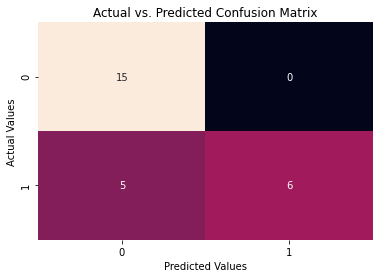

In [29]:
pred=rf.predict(X_test)

test_crosstb_comp = pd.crosstab(index = y_test, columns = pred)
test_crosstb = test_crosstb_comp.values

sns.heatmap(test_crosstb, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

ROC Curve

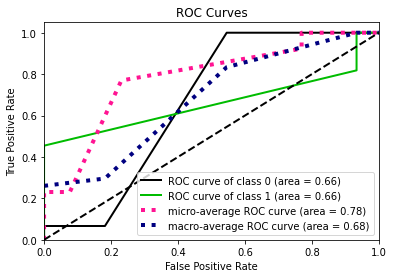

In [30]:
prediction_probability = mlp.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, prediction_probability)
plt.show()

# SVM

## Hyperparameter Optimisation

In [39]:
clf = svm.SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}  
  
grid = GridSearchCV(clf, param_grid, n_jobs=-1, cv=3) 

grid.fit(X_train, y_train) 

print('Best parameters are: ', grid.best_params_) 

Best parameters are:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


## SVM Classifer

In [42]:
clf.set_params(C = 1, gamma= 'scale', kernel = 'rb0f', probability=True)
# estimator.get_params().keys()

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Results

Classification Report

In [44]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       1.00      0.45      0.62        11

    accuracy                           0.77        26
   macro avg       0.86      0.73      0.73        26
weighted avg       0.84      0.77      0.75        26



Confusion Matrix

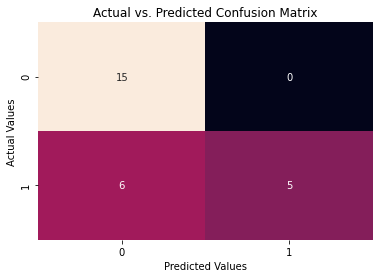

In [45]:
test_crosstb_comp = pd.crosstab(index = y_test, columns = pred)
test_crosstb = test_crosstb_comp.values

sns.heatmap(test_crosstb, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

ROC curve

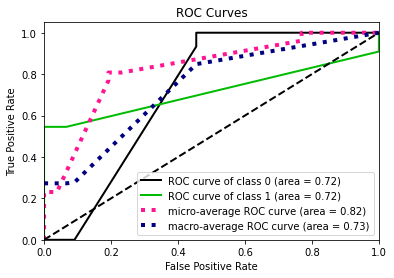

In [46]:
prediction_probability = clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, prediction_probability)
plt.show()